# Customer Segmentation using Kmeans Clustering

# Step 1. Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step 2. Import Data

In [2]:
df = pd.read_csv('DATA/Mall_Customers.csv', index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
print(df.dtypes)
print(df.shape)
print(df.describe())

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 4)
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


# Data Visulization

<function matplotlib.pyplot.show(*args, **kw)>

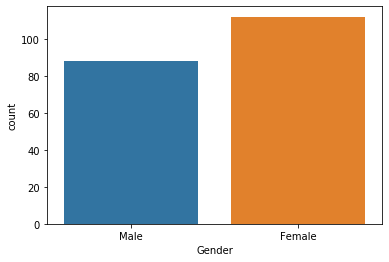

In [4]:
#Count Plot for single variable
sns.countplot(x = 'Gender',data = df)
plt.show

In the data set we have more no. of female customers then male customers

In [5]:
#Count of female and male customers
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

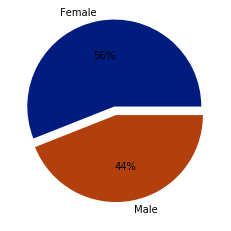

In [6]:
#Declaring data
data = [112,88]
keys = ['Female','Male']

#Declearing Exploding data
explode = [0.1,0] #Separets specefic slice of the pie chart

#Define Seaborn color palette
palette_color = sns.color_palette('dark')

#Plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
       explode = explode, autopct='%.0f%%')

#Displaying Chart
plt.show()

Using Pie chart we get the percentage of male and female customers

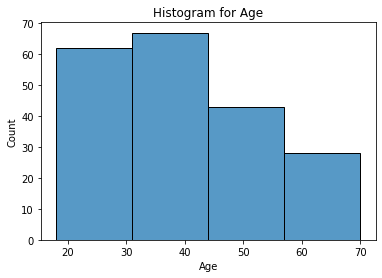

In [7]:
#Histogram Plt
sns.histplot(data = df,
            x='Age',
            bins = 4)
plt.title("Histogram for Age")

plt.show()

In histogram plot we observe that most of the customer in Mall at the Age group of 20 to 42 by observing the chart

In [8]:
sns.__version__ #Cheking the version of sns

'0.11.2'

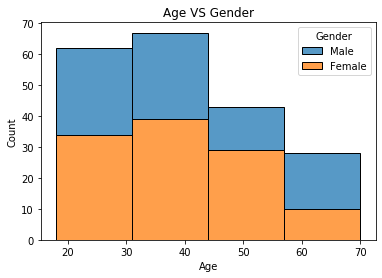

In [9]:
#Histogram Plt
sns.histplot(data = df,
            x='Age',
            bins = 4,
            hue = "Gender",
            multiple = "stack")
plt.title("Age VS Gender")

plt.show()

At age 20 to 30 there are approx 33 female, at age 30 to 40 39 female.....

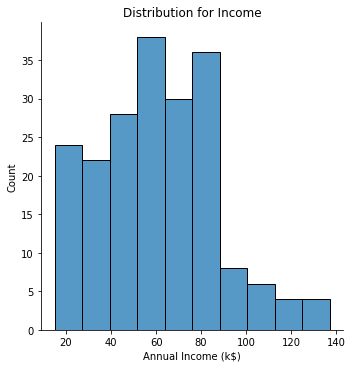

In [10]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Distribution for Income")
plt.show()

Here K$ means for eg. if the value is 15 means 15k$(15 thousand dollors)

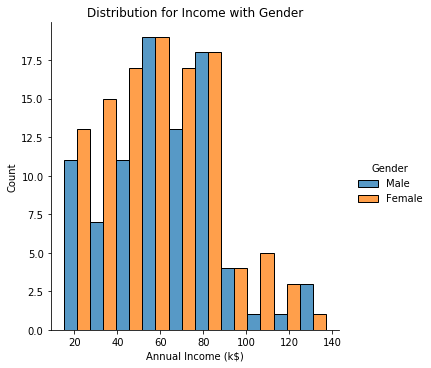

In [11]:
sns.displot(df, x="Annual Income (k$)",hue="Gender",multiple="dodge")
plt.title("Distribution for Income with Gender")
plt.show()

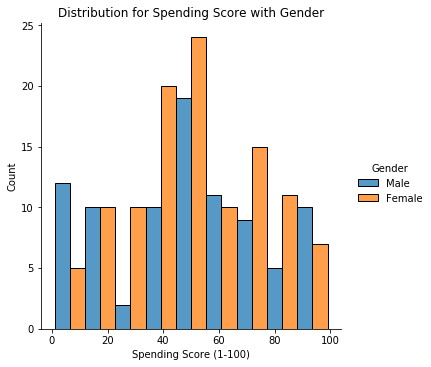

In [12]:
sns.displot(df, x="Spending Score (1-100)",hue="Gender",multiple="dodge")
plt.title("Distribution for Spending Score with Gender")
plt.show()

Between 40 to 60 female has more spending score

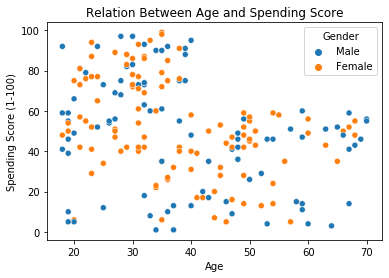

In [13]:
sns.scatterplot(data=df, x="Age",y="Spending Score (1-100)",hue="Gender")
plt.title("Relation Between Age and Spending Score")
plt.show()

In this plt we observe that most of the customer at the age of 20 to 40 are spending more.

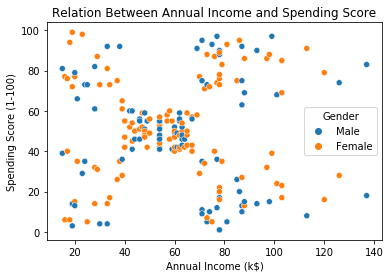

In [14]:
sns.scatterplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.title("Relation Between Annual Income and Spending Score")
plt.show()

In this plt we observe that clusters are created

# Step 4:Data Preprocessing

In [15]:
print(df.shape)
print(df.info()) 


(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None


In [16]:
df.isnull().sum() 

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


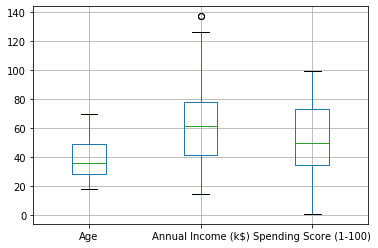

In [18]:
df.boxplot()
plt.show()

In [19]:
X = df.iloc[: , 2:4] #2,4 means column index location(Annual Income (k$),Spending Score (1-100))

In [20]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [27]:
%%time

#Using the Elbow method to find the optimal number of Clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm #Progress Bar

K_MAX = 11

wsse = []

with tqdm(total=K_MAX-1) as pbar:
    for i in range(1, K_MAX):
        
        kmeans = KMeans(n_clusters=i, random_state =10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 338 ms


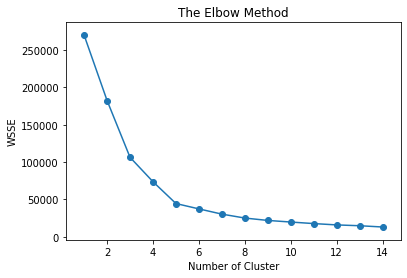

In [22]:
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WSSE')
plt.show()

In [32]:
# Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 5,random_state = 10)
kmeans.fit(X)
Y_pred= kmeans.predict(X)

In [33]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [30]:
kmeans.n_iter_

3

In [31]:
df["Clusters"]=Y_pred
df.head(50)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


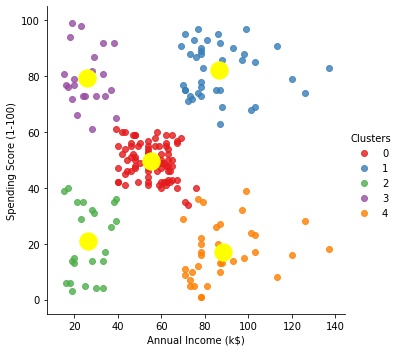

In [34]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg=False,
          hue='Clusters',
          palette="Set1")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow')
plt.show()

In [35]:
df["Clusters"]=df.Clusters.map({0:"Sensible",1:"Target",2:"Not Useful",3:"Careless",4:"Carefull"})

In [36]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Not Useful
2,Male,21,15,81,Careless
3,Female,20,16,6,Not Useful
4,Female,23,16,77,Careless
5,Female,31,17,40,Not Useful


In [37]:
df.to_csv(r"TargetCustomer.csv",index=True)